In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Combined_Teams_2024_Updated.csv')
# Dropping the columns that are non-discrete
# Dropping the columns stat_toal, hp, attack, defense, special_attack, special_defense, speed, move_1_power, move_1_effect, move_1_accuracy, move_2_power, move_2_effect, move_2_accuracy, move_3_power, move_3_effect, move_3_accuracy, move_4_power, move_4_effect, move_4_accuracy
df = df.drop(['tournament','wins','rank','stat_total', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'move_1_power', 'move_1_effect', 'move_1_effect_chance', 'move_1_accuracy','move_1_generation', 'move_2_power', 'move_2_effect','move_2_effect_chance', 'move_2_accuracy','move_2_generation', 'move_3_power', 'move_3_effect','move_3_effect_chance', 'move_3_accuracy','move_3_generation', 'move_4_power', 'move_4_effect','move_4_effect_chance', 'move_4_accuracy','move_4_generation','type', 'pokemon_generation'], axis=1)
# Dropping the type 2 column as it has a lot of missing values as well as type 1 column as its data is captured in the type column
df = df.drop(['type_one', 'type_two'], axis=1)
# Changing the Losses column to a binary column where more than 2 losses is 0 and 2 or less losses is 1
df['Good_Performance'] = df['losses'].apply(lambda x: 0 if x > 3 else 1)
# Dropping the losses column
df = df.drop(['losses'], axis=1)
df.head()

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,Good_Performance
0,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,1
1,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me,1
2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet,1
3,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick,1
4,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind,1


In [43]:
#counts of 1 and 0 in the Good_Performance column
df['Good_Performance'].value_counts()

Good_Performance
1    2748
0    1704
Name: count, dtype: int64

In [44]:
# Select features and target variable
features = ['pokemon', 'item', 'ability', 'tera type', 'move_1', 'move_2', 'move_3', 'move_4']
target = 'Good_Performance'

features = df[features]
target = df[target]

# Encode the categorical features
features = features.apply(LabelEncoder().fit_transform)
features

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
0,80,16,48,4,44,38,32,198
1,84,41,68,6,157,103,226,62
2,130,38,137,18,31,188,26,6
3,58,3,91,0,39,216,56,102
4,135,22,82,1,110,52,114,178
...,...,...,...,...,...,...,...,...
4447,89,38,28,8,127,215,92,201
4448,41,49,40,12,127,126,118,153
4449,47,52,82,1,137,111,205,63
4450,130,14,137,9,25,25,195,196


# Splitting into Train and Test Data


In [45]:
# Define X (features) and y (target)
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)

In [46]:
X_train

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
3223,2,80,94,6,127,137,153,167
872,18,39,120,8,127,97,30,174
2282,37,7,87,4,29,99,199,131
2558,130,14,137,18,168,25,99,196
627,96,49,26,16,37,38,41,131
...,...,...,...,...,...,...,...,...
2580,130,12,137,1,192,185,26,196
1945,130,14,137,9,168,25,216,89
4391,118,22,123,17,174,46,23,131
986,129,37,47,4,51,86,146,177


In [47]:
X_test

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
3107,18,38,119,8,127,97,165,174
3961,20,30,37,9,110,80,71,131
4078,13,18,5,18,65,86,213,131
3900,130,38,137,1,192,185,26,131
949,52,50,36,4,73,65,45,131
...,...,...,...,...,...,...,...,...
2374,45,7,87,9,78,186,17,74
3506,80,16,48,3,44,37,218,32
104,13,68,5,13,127,72,89,193
1970,130,14,137,18,186,188,26,6


# Logisitic Regression

In [48]:
# Train the Multinomial Naive Bayes model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.6273849607182941
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       332
           1       0.63      1.00      0.77       559

    accuracy                           0.63       891
   macro avg       0.31      0.50      0.39       891
weighted avg       0.39      0.63      0.48       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[  0, 332],
       [  0, 559]], dtype=int64)

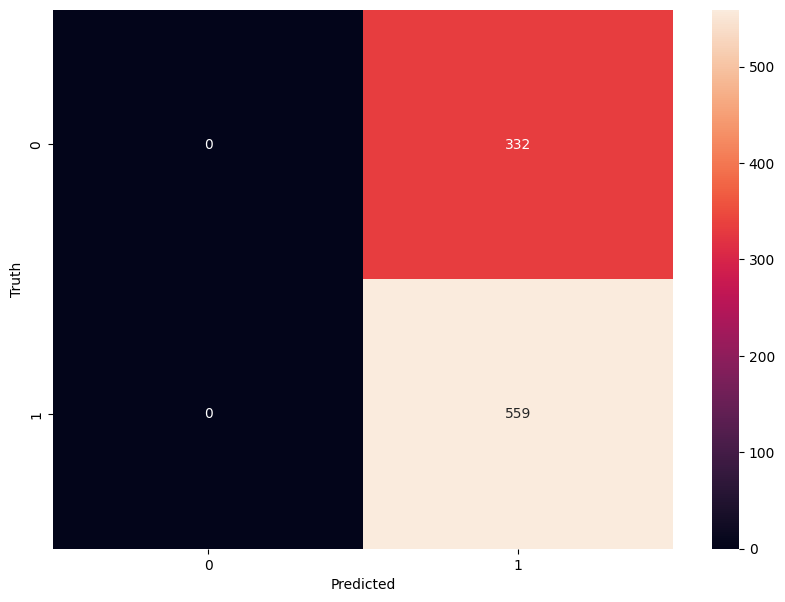

In [49]:
# graph the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Save the confusion matrix
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/ScreenShots/Confusion_Matrix_Logistic_Regression.png')
plt.show()


# Multinomial Naive Bayes

In [50]:
# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.5173961840628507
              precision    recall  f1-score   support

           0       0.38      0.49      0.43       332
           1       0.64      0.53      0.58       559

    accuracy                           0.52       891
   macro avg       0.51      0.51      0.51       891
weighted avg       0.54      0.52      0.53       891



array([[163, 169],
       [261, 298]], dtype=int64)

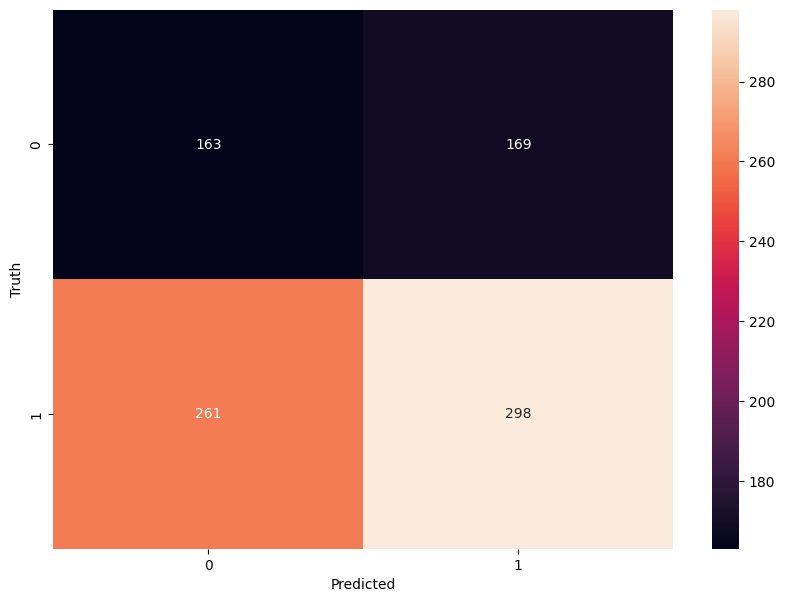

: 

In [ ]:
# graph the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Save the confusion matrix
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/ScreenShots/Confusion_Matrix_Multinomial_NB.png')
plt.show()
